# Microsoft Windows 11 Sentiment Analysis Project

# Business and Data Understanding 

#### The json dataset was obtained through real time data scrapping using spyder. This was more than 12 hours gathering of tweets from Twitter about Microsoft windows 11 on the 29th of November 2021. Our first hypothesis is expecting to see the word "Windows 11" as the most used word in our word frequency, descriptive analysis. Our second hypothesis is to find out  what consumers or customers say about the product, that is the number of positive tweets and negative tweets.

In [1]:
# import packages
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from wordcloud import WordCloud, STOPWORDS

from pattern.en import sentiment
from textblob import TextBlob

# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

import requests
from lxml import html
import seaborn as sns

import re
import pandas as pd

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

pd.set_option('display.max_colwidth', None)

from bs4 import BeautifulSoup   # python package to handle HTML 

import json
import nltk
import itertools
from collections import Counter
from operator import itemgetter

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import sklearn
import numpy as np
from collections import Counter

# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# suppress error messages
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

# Data identification and collection 

### API-based data collection for Descriptive Analysis, Word Frequency, Word Cloud and Sentiment Analysis

In [2]:
import json

# create an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('data/twitter_windows11.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

# lets see how many we got
print(len(data))

2375


In [3]:
# read the first five tweets and other meta data only
for i in data[:1]:
    print(i)

{'created_at': 'Mon Nov 29 13:58:25 +0000 2021', 'id': 1465319239607209994, 'id_str': '1465319239607209994', 'text': 'windows 11 buat amd masih suka ngebug ga', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 3046725103, 'id_str': '3046725103', 'name': 'ro§ëlv', 'screen_name': 'rsbersaline', 'location': 'Indonesia', 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 108, 'friends_count': 504, 'listed_count': 0, 'favourites_count': 7616, 'statuses_count': 8855, 'created_at': 'Fri Feb 27 14:17:02 +0000 2015', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': '000000', 'prof

# Data cleaning & Text preprocessing for API

In [4]:
# saving the entire tweets (not other data) in a variable and print it
texts = [ T['text'] for T in data if 'text' in T ]
len(texts)

2375

In [5]:
# removing any error messages from Twitter API
tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets) 

2375

In [6]:
# display five screen names (twitter user names)
for i in tweets[:5]:
    print(i['user']['screen_name'])

rsbersaline
LitonDev10
BetaNews
windowsdev
MiguelB59700764


In [7]:
# cleaning unwanted characters
texts_cleaned = []

for i in texts:
    result = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", i)
    texts_cleaned.append(result)

texts_cleaned[:5]

['windows 11 buat amd masih suka ngebug ga',
 'Windows 112022 HP 17 Laptop 11th Gen Intel i51135G7 16GB DDR4 512GB PCIe SSD 173 FHD IPS Screen Backlit Ke ',
 '0patch beats Microsoft to fix serious local privilege escalation vulnerability inWindows ',
 ' Hello there and good to hear youre enjoying it Were here to help you BTW these tips and trick ',
 'Tal como ya he explicado anteriormente me parece muy bien que la demanden']

In [8]:
# More codes for extracting information from tweets

ids = [T['id_str'] for T in tweets]
times = [T['created_at'] for T in tweets]
texts = [T['text'] for T in tweets]
screen_names = [T['user']['screen_name'] for T in tweets]
followers_count = [T['user']['followers_count'] for T in tweets]
friends_count = [T['user']['friends_count'] for T in tweets]
names = [T['user']['name'] for T in tweets]
lats = [(T['geo']['coordinates'][0] if T['geo'] else None) for T in tweets]
lons = [(T['geo']['coordinates'][1] if T['geo'] else None) for T in tweets]
place_names = [(T['place']['full_name'] if T['place'] else None) for T in tweets]
place_types = [(T['place']['place_type'] if T['place'] else None) for T in tweets]

# open an output csv file to write to
out = open('data/twitter_p.csv', 'w', encoding='UTF-8', newline='')

# write the header of our CSV as its first line
out.write('id,created at,text,screen name,followers_count,friends_count,name,lat,lon,place name,place type\n')

# merge each individual list into a single list using the zip function
rows = list(zip(ids, times, texts, screen_names, followers_count, friends_count, names, lats, lons, place_names, place_types))

# use the writer module on our csv file
csv = csv.writer(out)

# use one value from each of our rows list and write it to the csv as a new row
for row in rows:
    values = [value for value in row]
    #values = [(value.encode('utf8') if hasattr(value, 'encode') else value) for value in row]
    csv.writerow(values)

# close our csv file when done
out.close()


In [9]:
# Displaying data
df = pd.read_csv("data/twitter_p.csv")
df.head(2)

,id,created at,text,screen name,followers_count,friends_count,name,lat,lon,place name,place type
0,1465319239607209994,Mon Nov 29 13:58:25 +0000 2021,windows 11 buat amd masih suka ngebug ga,rsbersaline,108,504,ro§ëlv,NaN,NaN,NaN,NaN
1,1465319327108796422,Mon Nov 29 13:58:46 +0000 2021,"[Windows 11]2022 HP 17 Laptop, 11th Gen Intel i5-1135G7, 16GB DDR4, 512GB PCIe SSD, 17.3 FHD IPS Screen, Backlit Ke… https://t.co/lYcrNtaF3K",LitonDev10,91,1435,Laptop reviews,NaN,NaN,NaN,NaN


# Descriptive analytics for API

In [10]:
# how many tweets
len(texts)

2375

In [11]:
# how many tweets with hashtag?
# extract and display all hashtags from first 10 tweets
for tweet in texts:
    len(re.findall(r"(?<=#)\w+", tweet))

In [12]:
counthashtag = 0

for tweet in texts:
    if len(re.findall(r"(?<=#)\w+", tweet)) > 0:
        counthashtag += 1
        
print(counthashtag)

323


In [13]:
# remove retweets so we can extract all original tweets and save them
originaltweets = []
for tweet in texts:
    if 'rt @' not in tweet.lower():
        originaltweets.append(tweet)
        
len(originaltweets)

1494

In [14]:
# get retweets only
#remove original tweets
retweets_only = []
for tweet in texts:
      if 'rt @' in tweet.lower():
            retweets_only.append(tweet)
        
len(retweets_only)

881

### Tweet: Time series

In [15]:
# saving 'created_at' from the twitter data
times = [T['created_at'] for T in tweets]
len(times)

2375

In [16]:
# set index on time
time_df = pd.DataFrame(times)
time_df.columns = ['time']
time_df['time'] = pd.to_datetime(time_df['time'])   # data type to datetime
time_df = time_df.set_index('time')    # time as index
time_df.head()

""
time
2021-11-29 13:58:25+00:00
2021-11-29 13:58:46+00:00
2021-11-29 13:58:57+00:00
2021-11-29 13:59:00+00:00
2021-11-29 13:59:05+00:00


In [17]:
import pytz
central = pytz.timezone('US/Central')
time_df.index = time_df.index.tz_convert(central)
time_df.head()

""
time
2021-11-29 07:58:25-06:00
2021-11-29 07:58:46-06:00
2021-11-29 07:58:57-06:00
2021-11-29 07:59:00-06:00
2021-11-29 07:59:05-06:00


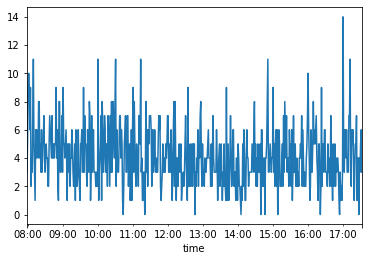

In [18]:
# visualize minute-level trend
time_df.resample('1Min').size().plot();

### User metrics

In [19]:
# how many unique users in the data?
u = Counter(screen_names)
len(u)

2027

### Most active users

In [20]:
c = Counter(screen_names)
# five most active tweeters
u.most_common(5)

[('Sanpakaews71Pa', 15),
 ('IZwr80g', 14),
 ('WiredCorner', 12),
 ('DoffyShop', 10),
 ('windowsdev', 9)]

In [21]:
# make it pretty
activetweeters_df = pd.DataFrame(c.most_common(5))
activetweeters_df

,0,1
0,Sanpakaews71Pa,15
1,IZwr80g,14
2,WiredCorner,12
3,DoffyShop,10
4,windowsdev,9


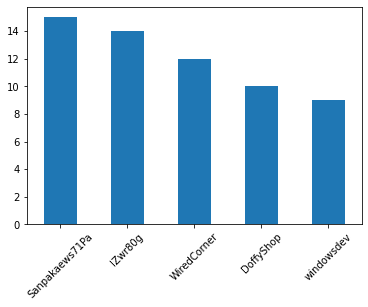

In [22]:
# visualize the above results
ax = activetweeters_df.plot(kind='bar', legend=False)
ax.set_xticklabels(activetweeters_df[0], rotation=45);

### Who is sharing location information?

In [23]:
#how many tweets contain geocode
geo = [T['user']['geo_enabled'] for T in tweets if 'user' in T]
c = Counter(geo)
print(c)

Counter({False: 1715, True: 660})


In [24]:
# the out put is in dictionary
print(c.keys(), c.values())

dict_keys([False, True]) dict_values([1715, 660])


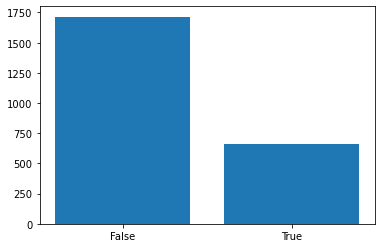

In [25]:
# visualize the above results
plt.bar(range(len(c)), c.values())
plt.xticks(range(len(c)), c.keys());

### Most visible users

In [26]:
# first extract all users from tweets
#let's use regular expression ...     
for tweet in texts[:5]:
    print(re.findall(r"(?<=@)\w+", tweet))

[]
[]
[]
['FinlayTomasMead']
[]


In [27]:
# there could be multiple mentions in a single tweet
for tweet in texts[:5]:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        print('@'+i)

@FinlayTomasMead


In [28]:
visible_users = []
for tweet in texts:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        visible_users.append(['@'+i][0])

In [29]:
# 10 most visible users in this dataset
c = Counter(visible_users)
c.most_common(10)

[('@0gtweet', 316),
 ('@Microsoft', 29),
 ('@Windows', 26),
 ('@TheHackersNews', 21),
 ('@crg_a18', 20),
 ('@teamguilded', 20),
 ('@PolucionBogota', 14),
 ('@james____rankin', 13),
 ('@ZDNet', 13),
 ('@fakirmeditation', 13)]

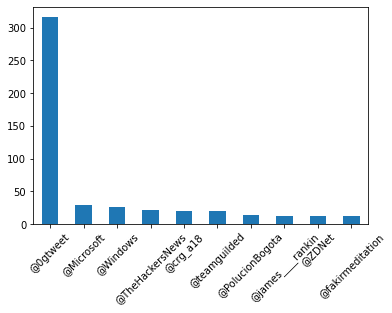

In [30]:
# visualize 10 most visible users
visible_df = pd.DataFrame(c.most_common(10))
ax = visible_df.plot(kind='bar', legend=False)
ax.set_xticklabels(visible_df[0], rotation=45);

### Where do people live?

In [31]:
location = [i['user']['location'] for i in tweets ]
len(location)

2375

In [32]:
for i in location[:10]:   # first 10 twitter users
    print(i)

Indonesia
None
Earth
Redmond, WA
Ourense, capital nintendera desde 1986.
United States
Hyderabad, India
cyberspace
Reading, England
Chile


- Location of users are very important when it comes to identifying the target market. Here, we have Indonesia as the comesountry with thee most users tweeting about windows 11. The location is Redmond, WA that is uUnited States. United States and India follows next.

In [33]:
# display lcation in a dataframe
locations = pd.DataFrame(location)
locations.head()

,0
0,Indonesia
1,None
2,Earth
3,"Redmond, WA"
4,"Ourense, capital nintendera desde 1986."


In [34]:
# checking the dominationg country
locations.value_counts()

United States           23
France                  15
USA                     15
東京                      15
España                  15
                        ..
João Pessoa, Brasil      1
Juiz de Fora, Brasil     1
Kampala, Uganda          1
Kelowna                  1
🦊📲🤩🎏🎲🌟🥺                  1
Length: 1100, dtype: int64

- Identifying the top locations, we have United States, France, Espana, Brazil and others. This shows the market for windows 11 users.

### Word Frequency

In [35]:
# With our word frequency, stopwords were excluded since most of the words in the dataset are none English words.
from html import unescape

def freq_analysis(texts):
    tokens = str(texts)
    #lowecases
    tokens = tokens.lower()
    # remove HTML related characters (&amp’,’&quot’,etc.)
    soup = BeautifulSoup(unescape(tokens), 'lxml')
    # remove urls
    tokens = re.sub(r'http\S+', '', soup.text)
    # Remove useless numbers and alphanumerical words
    tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
    #tokenization or word split
    tokens = word_tokenize(tokens)
    # Filter non-alphanumeric characters from tokens
    tokens = (word for word in tokens if word.isalpha())
    #additional stopwrods
    more_stopwords = set(('cant', 'aint', 'today'))
    extra_stoplist = set(stopwords.words('english')) | more_stopwords
    tokens = (word for word in tokens if word not in extra_stoplist)
    #remove short words
    tokens = (word for word in tokens if len(word) >= 3)
    #compute frequency distribution for all the bigrams in the text
    fdist = nltk.FreqDist(tokens)
    
    #k refers to keys (or tokens); v refers to values (or counts)
    return  fdist

In [36]:
# identifying first 10 words
fdist = freq_analysis(originaltweets)
for k,v in list(fdist.items())[:10]:
    print(k,v)

windows 1277
buat 1
amd 21
masih 1
suka 1
ngebug 1
laptop 65
gen 13
intel 48
pcie 2


In [37]:
# top 10 words
fdist.most_common(10)

[('windows', 1277),
 ('microsoft', 171),
 ('que', 91),
 ('new', 74),
 ('laptop', 65),
 ('update', 55),
 ('work', 49),
 ('intel', 48),
 ('ssd', 47),
 ('ram', 43)]

In [38]:
# With our word frequency, stopwords were excluded since most of the words in the dataset are none English words.
from html import unescape

def freq_analysis(texts):
    tokens = str(texts)
    #lowecases
    tokens = tokens.lower()
    # remove HTML related characters (&amp’,’&quot’,etc.)
    soup = BeautifulSoup(unescape(tokens), 'lxml')
    # remove urls
    tokens = re.sub(r'http\S+', '', soup.text)
    # Remove useless numbers and alphanumerical words
    tokens = re.sub("[^a-zA-Z]", " ", tokens)
    #tokenization or word split
    tokens = word_tokenize(tokens)
    # Filter non-alphanumeric characters from tokens
    tokens = (word for word in tokens if word.isalpha())
    #additional stopwrods
    more_stopwords = set(('cant', 'aint', 'today'))
    extra_stoplist = set(stopwords.words('english')) | more_stopwords
    tokens = (word for word in tokens if word not in extra_stoplist)
    #remove short words
    tokens = (word for word in tokens if len(word) >= 3)
    bigrams = nltk.bigrams(tokens)
    #compute frequency distribution for all the bigrams in the text
    fdist_bi = nltk.FreqDist(bigrams)
    #k refers to keys (or tokens); v refers to values (or counts)
    return fdist_bi

In [39]:
# identifying first 10 words
fdist_bi = freq_analysis(originaltweets)
for k,v in list(fdist_bi.items())[:10]:
    print(k,v)

('windows', 'buat') 1
('buat', 'amd') 1
('amd', 'masih') 1
('masih', 'suka') 1
('suka', 'ngebug') 1
('ngebug', 'windows') 1
('windows', 'laptop') 9
('laptop', 'gen') 1
('gen', 'intel') 6
('intel', 'ddr') 1


In [40]:
# top 10 words
fdist_bi.most_common(10)

[(('windows', 'windows'), 119),
 (('microsoft', 'windows'), 38),
 (('puedes', 'solucionar'), 32),
 (('solucionar', 'sus'), 32),
 (('sus', 'problemas'), 32),
 (('arreglamos', 'windows'), 31),
 (('windows', 'puedes'), 31),
 (('problemas', 'molestos'), 31),
 (('molestos', 'devolver'), 30),
 (('devolver', 'funciones'), 30)]

#### From our word frequency analysis, the most common pairs of  words are windows and windows. Folloewd by Microsoft windows. In relation to the most common used single word, we hard windows which was followed by microsoft. The graph below shows the most frequently used pair of words in the tweets. 

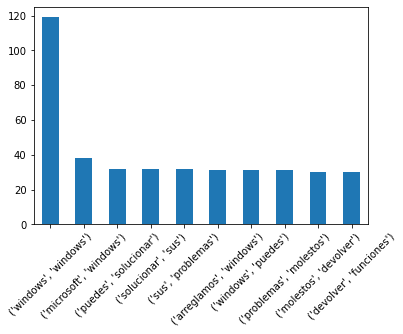

In [41]:
# visualize 10 most visible user
ha = fdist_bi.most_common(10)
ha_df = pd.DataFrame(ha)

ax = ha_df.plot(kind='bar', legend=False)
ax.set_xticklabels(ha_df[0], rotation=45);

### Wordcloud Analysis

In [42]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from wordcloud import WordCloud, STOPWORDS
mask = np.array(Image.open("data/butterfly.png"))

stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("the")
stopwords.add("you")
stopwords.add("yours")
stopwords.add("can")
stopwords.add("and")
stopwords.add("that")
stopwords.add("will")
stopwords.add("one")
stopwords.add("able")
stopwords.add("etc")
stopwords.add("has")
stopwords.add("done")
stopwords.add("see")
stopwords.add("new")
stopwords.add("first")

wordcloud = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(' '.join(texts_cleaned))


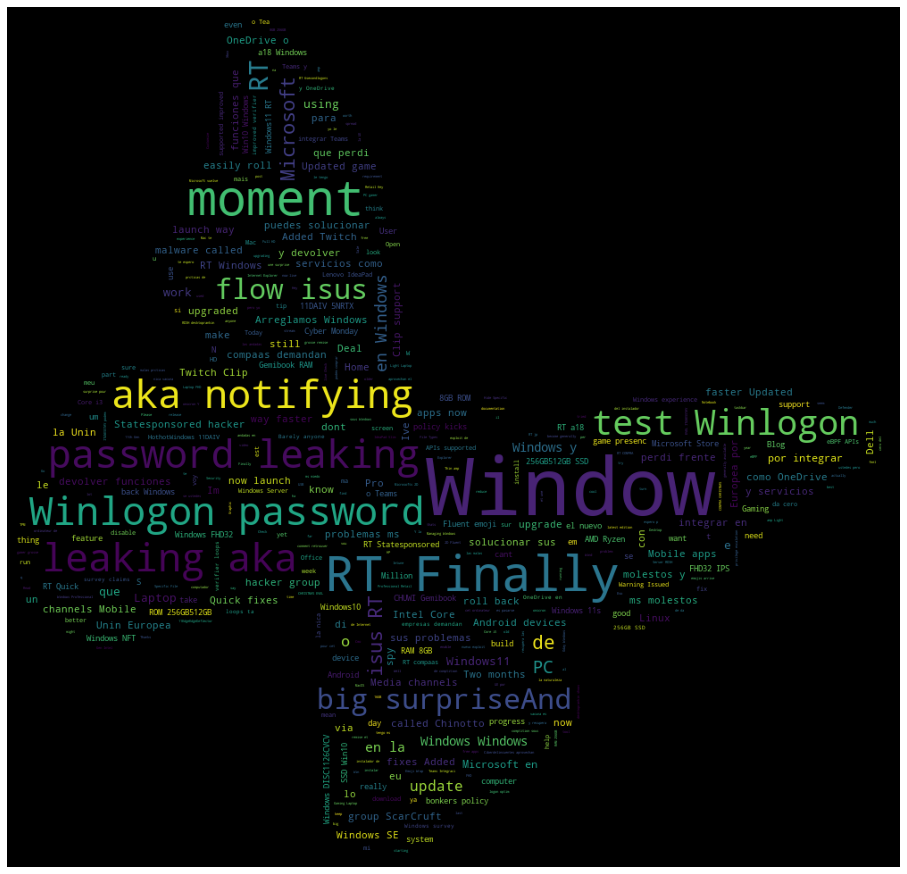

(-0.5, 999.5, 962.5, -0.5)

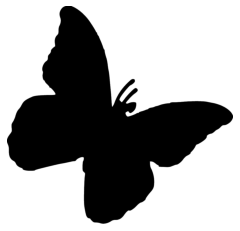

In [43]:
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis("off")

#### From the wordcloud analysis above we can clearly see the most popular words. we can see windows appearing bold in the mist of other words. We can also see winlogo, finally, update, password and others.

# Sentiment Analysis

In [44]:
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

texts[:5]

['windows 11 buat amd masih suka ngebug ga',
 '[Windows 11]2022 HP 17 Laptop, 11th Gen Intel i5-1135G7, 16GB DDR4, 512GB PCIe SSD, 17.3 FHD IPS Screen, Backlit Ke… https://t.co/lYcrNtaF3K',
 '0patch beats Microsoft to fix serious local privilege escalation vulnerability in\xa0Windows https://t.co/J99QsVh4Zc',
 "@FinlayTomasMead Hello there and good to hear you're enjoying it. We're here to help you. BTW, these tips and trick… https://t.co/Feg7v4eUYd",
 'Tal como ya he explicado anteriormente, me parece muy bien que la demanden.']

In [45]:
# What is the overal sentiment? How many positive? how many negative? 

analyzer = SentimentIntensityAnalyzer()

for i in texts[:5]:
    vs = analyzer.polarity_scores(i)
    
    print(vs["compound"], vs["neg"], vs["neu"], vs["pos"]) 

0.0 0.0 1.0 0.0
0.0 0.0 1.0 0.0
0.0772 0.204 0.637 0.159
0.8402 0.0 0.667 0.333
0.0 0.0 1.0 0.0


In [46]:
#saving results with original data

finaldata = []

for i in texts: 
    vs = analyzer.polarity_scores(i)
    finaldata.append([i, vs["compound"]])

len(finaldata)

2375

In [47]:
# obtaining a dataframe for the text data.
df_2 = pd.DataFrame(finaldata)
df_2.columns = ['tweets', 'compound']
df_2.head(2)

,tweets,compound
0,windows 11 buat amd masih suka ngebug ga,0.0
1,"[Windows 11]2022 HP 17 Laptop, 11th Gen Intel i5-1135G7, 16GB DDR4, 512GB PCIe SSD, 17.3 FHD IPS Screen, Backlit Ke… https://t.co/lYcrNtaF3K",0.0


In [48]:
# Finding out the number of positive, negative and neutal words
positive_reviews = df.loc[df_2['compound'] > 0] # if compoundscore is > 0 then positive
negative_reviews = df.loc[df_2['compound'] < 0] # if compoundscore is < 0 then negative
neutral_reviews = df.loc[df_2['compound'] == 0] # if compoundscore is == 0 then neutral

print(len(positive_reviews))
print(len(negative_reviews))
print(len(neutral_reviews))

485
632
1258


#### From our sentiment analysis, we can deduce 485 positive reviews, 632 negative reviews and 1258 neutral reviews. We can vividly that negative tweets exceeds the number of positive tweets.

In [49]:
# Showing ten most negative tweets

df_2.sort_values('compound', ascending=True).head(10)

,tweets,compound
91,THE FUCK I DON'T LIKE TODAY I UPDATED WINDOWS TO WINDOWS 11 IT GOT STUCK AT 100 DOWNLOAD THEN RESTARTED IT THEN IT… https://t.co/UCu2H9vYO2,-0.8631
608,"@LetsEatAWasp It runs in a window well, but forced window resolution of 1024*768 - I've fired it up on Windows 11 w… https://t.co/qQxzIdBz2d",-0.8537
1875,"Hell just give burglers a route map, and a pre planned crime right down to doors, windows...",-0.8442
2198,has anyone downloaded windows 11? shi looks so clean but i’m scared it’s gon be shitty,-0.8178
477,📷 We “fixed” Windows 11: so you can fix its most annoying problems and return functions that it lost compared to Wi… https://t.co/HLxUfF44Og,-0.8059
480,We “fixed” Windows 11: so you can fix its most annoying problems and return functions that it lost compared to Wind… https://t.co/iNZ3GTVDZd,-0.8059
1114,@KayLuvsRea Damn\n\nWindows 11 fucked up my pc,-0.7964
1899,@Windows you guys are literally the worst people on the planet. STOP DATA MINING. NOBODY wants Windows 11. It's off… https://t.co/00VH21v8mY,-0.7925
1233,"Hey! Jumped into Windows 11 but are stymied by the Taskbar icons being centered? No worries, you can move 'em all b… https://t.co/3Mb1QXgKm2",-0.7777
2164,should i get windows 11 that update is bothering me but i saw the layout and its ass,-0.7615


#### Looking at the negative tweets, the top tweet  talks about the frustrations of the user. Another user talks about how windows 11 messed up their laptop. The tenth tweet talks about how updating bothers but the user actually likes the layout of windows 11. 

In [50]:
#showing ten most positive tweets

df_2.sort_values('compound', ascending=False).head(10)

,tweets,compound
2020,"Wise Care 365 6.1.3.598\n\nWise Care 365 is a comprehensive, all-in-one PC tune-up utility, that will keep your windo… https://t.co/xw17Tx7h5L",0.9274
506,Best help myself understand this first! \n\nHelp your students transition to Windows 11 with these helpful videos!… https://t.co/fQNNDT1egt,0.9183
391,"Finally getting comfortable using multiple monitors, and Windows 11 support is great, just wish there were an easy… https://t.co/8vJj6Ky9G3",0.9153
1487,@dbfssecret Woohoo! There are lots of great features in Windows 11. 😎 We're sure you'll be using it like a pro in n… https://t.co/D8TuoyPrnH,0.9098
1440,"@DaRedShark49 Welcome to the Windows 11 party! 🥳 Now don't be shy, we'd love to hear what you think of the upgrade so far.",0.8986
818,"Experience a safer and smarter way for educators and students to share. With affordable, safe, and easy-to-manage t… https://t.co/WZgmSABdti",0.8720
1813,Windows 11 has a great implementation of Virtual Desktops that will definitely help keep you organized and stay on-… https://t.co/B2FlpdsRbE,0.8591
694,@CarlWebster Windows 11 is great if your BIOS can support secure boot. Mine does not so Win10 it is. I tried tricki… https://t.co/mKgQVDvFbG,0.8481
2226,@Ichi_chan96 Awesome to hear you like it! Any feature or UI element in particular that caught you eye? Please share… https://t.co/KXAcNAL8I5,0.8478
237,"@Foone I'm gonna get tarred and feathered for this, but Windows 11 is actually pretty darn good, especially when yo… https://t.co/5U8XHnWM58",0.8462


#### For our positive tweets, the sentiments from users gives good feedback. For instance, the tenth tweet talks about how good windows 11 is. Another user also talks about how easy to implement virtual desktops. 

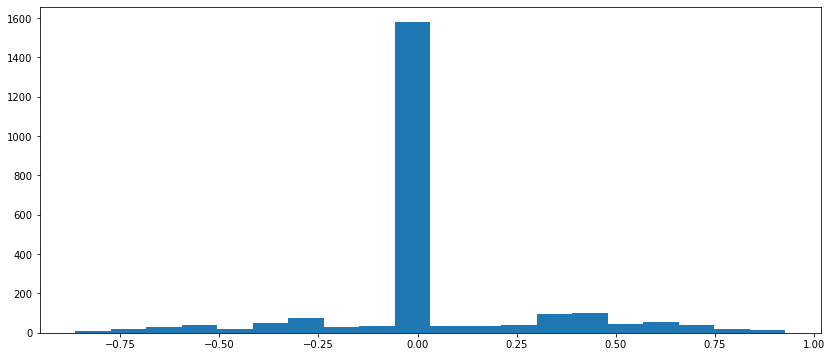

In [51]:
# visualization
plt.figure(figsize=(14,6))
plt.hist(df_2['compound'], bins=20);

# Storytelling & Conclusion

- Our descriptive analysis conducted showed 2375 tweets collected for analysis. Also, we identified the top locations, we have United States, France, Espana, Brazil and others. This shows the target markets for windows 11 users.
- The first hypothesis was to find out which word or words are the most common in the 2375 tweets. We expected to see Windows 11 as the most common used word. From our word frequency analysis and wordcloud analysis, the most common words pairing together was windows windows. Microsoft windows windows follows next as the second most occurring word pairs. Our analysis confirms our expectation or first hypothesis.
- The second hypothesis is find out how people on twitter feels about the windows 11. From the sentiment analysis conducted, we deduced 485 positive reviews, 632 negative reviews and 1258 neutral reviews. For an upgraded product such as the windows operating system, the baseline for comparison will be the current version. 
- From the analysis, we found out more negative tweets than the positive tweets and neutral tweets taking the bulk of all tweets. From our negative tweets, the deduction showed most of the tweets expressed dissatisfaction of most users or customers. From a tweets analyzed, most users shared their experiences with the new upgrade negatively. For instance, the top tweet from the most 10 tweets obtained talked about the frustrations of the user. Another user talks about how windows 11 messed up their laptop. The tenth tweet talks about how updating bothers but the user actually likes the layout of windows 11. 
- For our positive tweets, the sentiments from users gives good feedback. For instance, the tenth tweet talks about how good windows 11 is. Another user also talks about how easy to implement virtual desktops. 


## Implications
- From the descriptive analysis, we identified the market for windows 11 across the globe. The top locations or countries are United States, France, Espana, Brazil and others. With this information, managers have a way to properly target these markets (The target market here is a group of customers within a business's serviceable available market at which a business aims its marketing efforts and resources.) to fully optimize sales or revenue through strategic decision making.
- The sentiment of users of the product must be tackled as well. For instance, upgrading to windows 11 causing automatic restarts when it gets to 100% downloading. Other users are also scared upgrading to windows 11 even though it looks good to them. Managers can fix these issues by holding a live session on how to upgrade and show all potential issues that might come up to solidify trust in using the product. It will be great if a lower version of a laptop is used to prevent all doubts thereby increasing the faith of users in the product. 